# Application: Heterogeneous Effect of Gender on Wage Using Double Lasso

 We use US census data from the year 2012 to analyse the effect of gender and interaction effects of other variables with gender on wage jointly. The dependent variable is the logarithm of the wage, the target variable is *female* (in combination with other variables). All other variables denote some other socio-economic characteristics, e.g. marital status, education, and experience.  For a detailed description of the variables we refer to the help page.



This analysis allows a closer look how discrimination according to gender is related to other socio-economic variables.



In [1]:
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, 
DataStructures, NamedArrays, PrettyTables, StatsModels, Combinatorics, Plots

import CodecBzip2

LoadError: ArgumentError: Package DataStructures not found in current path:
- Run `import Pkg; Pkg.add("DataStructures")` to install the DataStructures package.


In [2]:
# Importing .Rdata file

cps2012 = load("../data/cps2012.RData")

Dict{String, Any} with 1 entry:
  "data" => 29217×23 DataFrame…

In [3]:
keys(cps2012)   # get information from key

KeySet for a Dict{String, Any} with 1 entry. Keys:
  "data"

In [4]:
cps2012

Dict{String, Any} with 1 entry:
  "data" => 29217×23 DataFrame…

In [5]:
cps2012 = cps2012["data"]

names(cps2012)

23-element Vector{String}:
 "year"
 "lnw"
 "female"
 "widowed"
 "divorced"
 "separated"
 "nevermarried"
 "hsd08"
 "hsd911"
 "hsg"
 "cg"
 "ad"
 "mw"
 "so"
 "we"
 "exp1"
 "exp2"
 "exp3"
 "exp4"
 "weight"
 "married"
 "ne"
 "sc"

In [6]:
    # couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [7]:
# Basic model 


reg = @formula(lnw ~ -1 + female + female&(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2 )


formula_basic = apply_schema(reg, schema(reg, cps2012))


FormulaTerm
Response:
  lnw(continuous)
Predictors:
  0
  female(continuous)
  widowed(continuous)
  divorced(continuous)
  separated(continuous)
  nevermarried(continuous)
  hsd08(continuous)
  hsd911(continuous)
  hsg(continuous)
  cg(continuous)
  ad(continuous)
  mw(continuous)
  so(continuous)
  we(continuous)
  exp1(continuous)
  exp2(continuous)
  exp3(continuous)
  widowed(continuous) & divorced(continuous)
  widowed(continuous) & separated(continuous)
  widowed(continuous) & nevermarried(continuous)
  widowed(continuous) & hsd08(continuous)
  widowed(continuous) & hsd911(continuous)
  widowed(continuous) & hsg(continuous)
  widowed(continuous) & cg(continuous)
  widowed(continuous) & ad(continuous)
  widowed(continuous) & mw(continuous)
  widowed(continuous) & so(continuous)
  widowed(continuous) & we(continuous)
  widowed(continuous) & exp1(continuous)
  widowed(continuous) & exp2(continuous)
  widowed(continuous) & exp3(continuous)
  divorced(continuous) & separated(continuo

In [8]:
formula_basic

FormulaTerm
Response:
  lnw(continuous)
Predictors:
  0
  female(continuous)
  widowed(continuous)
  divorced(continuous)
  separated(continuous)
  nevermarried(continuous)
  hsd08(continuous)
  hsd911(continuous)
  hsg(continuous)
  cg(continuous)
  ad(continuous)
  mw(continuous)
  so(continuous)
  we(continuous)
  exp1(continuous)
  exp2(continuous)
  exp3(continuous)
  widowed(continuous) & divorced(continuous)
  widowed(continuous) & separated(continuous)
  widowed(continuous) & nevermarried(continuous)
  widowed(continuous) & hsd08(continuous)
  widowed(continuous) & hsd911(continuous)
  widowed(continuous) & hsg(continuous)
  widowed(continuous) & cg(continuous)
  widowed(continuous) & ad(continuous)
  widowed(continuous) & mw(continuous)
  widowed(continuous) & so(continuous)
  widowed(continuous) & we(continuous)
  widowed(continuous) & exp1(continuous)
  widowed(continuous) & exp2(continuous)
  widowed(continuous) & exp3(continuous)
  divorced(continuous) & separated(continuo

In [9]:
# get variabl'es name

coefnames(formula_basic)

("lnw", Any["female", "widowed", "divorced", "separated", "nevermarried", "hsd08", "hsd911", "hsg", "cg", "ad"  …  "female & hsd911", "female & hsg", "female & cg", "female & ad", "female & mw", "female & so", "female & we", "female & exp1", "female & exp2", "female & exp3"])

In [10]:
Y = select(cps2012,:lnw)  # uptcome variable
control = coefnames(formula_basic)[2]  # regresors control 
names_col = Symbol.(control)  # string to Symbol to create varaible's name 

136-element Vector{Symbol}:
 :female
 :widowed
 :divorced
 :separated
 :nevermarried
 :hsd08
 :hsd911
 :hsg
 :cg
 :ad
 :mw
 :so
 :we
 ⋮
 Symbol("female & nevermarried")
 Symbol("female & hsd08")
 Symbol("female & hsd911")
 Symbol("female & hsg")
 Symbol("female & cg")
 Symbol("female & ad")
 Symbol("female & mw")
 Symbol("female & so")
 Symbol("female & we")
 Symbol("female & exp1")
 Symbol("female & exp2")
 Symbol("female & exp3")

In [11]:
X = StatsModels.modelmatrix(formula_basic,cps2012)

29217×136 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  22.0  4.84    10.648
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  30.0  9.0     27.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0   0.0  0.0      0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  14.0  1.96     2.744
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0   0.0  0.0      0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0   0.0  0.0      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  15.5  2.4025   3.72388
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0   0.0  0.0      0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   7.0  0.49     0.343
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0      0.0
 ⋮            

In [12]:
X = DataFrame(X, names_col)

29217×136 DataFrame
   Row │ female   widowed  divorced  separated  nevermarried  hsd08    hsd911  ⋯
       │ Float64  Float64  Float64   Float64    Float64       Float64  Float64 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
     2 │     1.0      0.0       0.0        0.0           0.0      0.0      1.0
     3 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     4 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
     5 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
     6 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     7 │     0.0      0.0       0.0        0.0           1.0      0.0      0.0
     8 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     9 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
    10 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
    11 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
   ⋮   │    ⋮        ⋮        ⋮          ⋮           ⋮           ⋮        ⋮    ⋱
 29208 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0
 29209 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0 ⋯
 29210 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29211 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29212 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
 29213 │     0.0      0.0       0.0        0.0           1.0      0.0      0.0 ⋯
 29214 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0
 29215 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
 29216 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29217 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
                                              129 columns and 29196 rows omitted

In [13]:
# Function to get index of constant columns   

cons_column = []


for i in 1:size(X,2)
    if var(X[!,i]) == 0
        append!(cons_column  , i)      
    end       
end


In [14]:
# Drop constant columns 

names(X)[cons_column]
select!(X, Not(names(X)[cons_column]))

29217×116 DataFrame
   Row │ female   widowed  divorced  separated  nevermarried  hsd08    hsd911  ⋯
       │ Float64  Float64  Float64   Float64    Float64       Float64  Float64 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
     2 │     1.0      0.0       0.0        0.0           0.0      0.0      1.0
     3 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     4 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
     5 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
     6 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     7 │     0.0      0.0       0.0        0.0           1.0      0.0      0.0
     8 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
     9 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
    10 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
    11 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
   ⋮   │    ⋮        ⋮        ⋮          ⋮           ⋮           ⋮        ⋮    ⋱
 29208 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0
 29209 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0 ⋯
 29210 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29211 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29212 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
 29213 │     0.0      0.0       0.0        0.0           1.0      0.0      0.0 ⋯
 29214 │     1.0      0.0       0.0        0.0           1.0      0.0      0.0
 29215 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0
 29216 │     0.0      0.0       0.0        0.0           0.0      0.0      0.0
 29217 │     1.0      0.0       0.0        0.0           0.0      0.0      0.0 ⋯
                                              109 columns and 29196 rows omitted

In [15]:
# demean function
function desv_mean(a)
    a = Matrix(a)   # dataframe to matrix 
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    
    return M
end    


# Matrix Model & demean

X = DataFrame(desv_mean(X), names(X)) # Dataframe and names 

29217×116 DataFrame
   Row │ female     widowed      divorced   separated   nevermarried  hsd08    ⋯
       │ Float64    Float64      Float64    Float64     Float64       Float64  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410 ⋯
     2 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
     3 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
     4 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
     5 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410 ⋯
     6 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
     7 │ -0.428757  -0.00797481  -0.113393  -0.0165999      0.843653  -0.00410
     8 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
     9 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410 ⋯
    10 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
    11 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
   ⋮   │     ⋮           ⋮           ⋮          ⋮            ⋮            ⋮    ⋱
 29208 │  0.571243  -0.00797481  -0.113393  -0.0165999      0.843653  -0.00410
 29209 │  0.571243  -0.00797481  -0.113393  -0.0165999      0.843653  -0.00410 ⋯
 29210 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
 29211 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
 29212 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
 29213 │ -0.428757  -0.00797481  -0.113393  -0.0165999      0.843653  -0.00410 ⋯
 29214 │  0.571243  -0.00797481  -0.113393  -0.0165999      0.843653  -0.00410
 29215 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
 29216 │ -0.428757  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410
 29217 │  0.571243  -0.00797481  -0.113393  -0.0165999     -0.156347  -0.00410 ⋯
                                              111 columns and 29196 rows omitted

In [16]:
# index to get columns that contains female

index = []

for i in 1:size(X,2)  
        if contains( names(X)[i] , "female")
            append!(index, i)
        end  
end

In [17]:
index

16-element Vector{Any}:
   1
 102
 103
 104
 105
 106
 107
 108
 109
 110
 111
 112
 113
 114
 115
 116

In [18]:
# Control variables 

W = select(X, Not(names(X)[index]))

29217×100 DataFrame
   Row │ widowed      divorced   separated   nevermarried  hsd08       hsd911  ⋯
       │ Float64      Float64    Float64     Float64       Float64     Float64 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
     2 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072   0.9778
     3 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     4 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     5 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
     6 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     7 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
     8 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     9 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
    10 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
    11 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
   ⋮   │      ⋮           ⋮          ⋮            ⋮            ⋮           ⋮   ⋱
 29208 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
 29209 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221 ⋯
 29210 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29211 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29212 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29213 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221 ⋯
 29214 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
 29215 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29216 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29217 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
                                               95 columns and 29196 rows omitted

In [19]:
# load HDM package

include("hdmjl/hdmjl.jl")

In [20]:
for i in index
    print(names(X)[i], "\n")
end

female
female & widowed
female & divorced
female & separated
female & nevermarried
female & hsd08
female & hsd911
female & hsg
female & cg
female & ad
female & mw
female & so
female & we
female & exp1
female & exp2
female & exp3


# HDM package

In [21]:
table = NamedArray(zeros(16, 2))

j = 0

X_resid = Vector{Float64}()  # empty vector - float 

for i in index

j = j + 1
    
#first step
D = select(X, names(X)[i])
    
D_reg_0  = rlasso_arg( W, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

D_resid =  rlasso(D_reg_0)["residuals"]

    
append!( X_resid, D_resid )

    
end 

In [32]:
W

29217×100 DataFrame
   Row │ widowed      divorced   separated   nevermarried  hsd08       hsd911  ⋯
       │ Float64      Float64    Float64     Float64       Float64     Float64 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
     2 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072   0.9778
     3 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     4 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     5 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
     6 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     7 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
     8 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
     9 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
    10 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
    11 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
   ⋮   │      ⋮           ⋮          ⋮            ⋮            ⋮           ⋮   ⋱
 29208 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
 29209 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221 ⋯
 29210 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29211 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29212 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29213 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221 ⋯
 29214 │ -0.00797481  -0.113393  -0.0165999      0.843653  -0.0041072  -0.0221
 29215 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29216 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221
 29217 │ -0.00797481  -0.113393  -0.0165999     -0.156347  -0.0041072  -0.0221 ⋯
                                               95 columns and 29196 rows omitted

In [23]:
#second step

Y_reg_0  = rlasso_arg( W, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

Y_resid = rlasso(Y_reg_0)["residuals"]

X_resid = reshape(X_resid, length(Y_resid), length(index))  # reshape stacked vector to mattrix 


29217×16 Matrix{Float64}:
  0.567918  4.2067e-16  -4.16334e-15  …   12.8248     2.8194       6.32254
  0.745968  4.2067e-16  -4.16334e-15      21.3128     6.2255      18.6011
 -0.353627  4.2067e-16  -1.62648e-14      -6.61143   -1.23522     -2.79376
  0.646373  4.2067e-16  -1.62648e-14       9.46843    1.40668      1.63816
 -0.432082  4.2067e-16  -4.16334e-15      -6.26339   -0.951552    -1.36754
 -0.353627  4.2067e-16  -1.62648e-14  …   -8.27531   -1.92782     -4.93616
 -0.353627  4.2067e-16  -1.62648e-14     -12.435     -4.23126    -14.3806
 -0.432082  4.2067e-16  -4.16334e-15      -9.79914   -2.30178     -5.26157
 -0.432082  4.2067e-16  -4.16334e-15      -6.26339   -0.951552    -1.36754
  0.567918  4.2067e-16  -4.16334e-15       9.02862    1.38786      2.21225
 -0.353627  4.2067e-16  -1.62648e-14  …   -5.77949   -0.937951    -2.00022
  0.567918  4.2067e-16  -4.16334e-15       4.06438    0.269973     0.261467
 -0.432082  4.2067e-16  -4.16334e-15      -4.80749   -0.567165    -0.592691

In [24]:
# third step
    
Lasso_HDM = lm(X_resid, Y_resid)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
──────────────────────────────────────────────────────────────────────
           Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────
x1   -0.16132     0.0389166   -4.15    <1e-04  -0.237598   -0.0850416
x2    0.144424    0.0906545    1.59    0.1111  -0.0332626   0.322111
x3    0.140591    0.0221825    6.34    <1e-09   0.097112    0.184069
x4    0.0524948   0.0532334    0.99    0.3241  -0.0518451   0.156835
x5    0.171391    0.0202072    8.48    <1e-16   0.131784    0.210998
x6   -0.0492215   0.121268    -0.41    0.6848  -0.286911    0.188468
x7   -0.142358    0.051854    -2.75    0.0060  -0.243994   -0.0407218
x8   -0.0219008   0.0192306   -1.14    0.2548  -0.0595936   0.015792
x9    0.00682406  0.0183583    0.37    0.7101  -0.029159    0.0428071
x10  -0.0200885   0.021893    -0.92

In [25]:
GLM.coeftable(Lasso_HDM).cols[2]

16-element Vector{Float64}:
 0.03891662545709848
 0.09065446052022239
 0.022182461582127274
 0.05323343595493935
 0.020207233641098263
 0.12126752927087239
 0.05185404453444545
 0.019230576835849073
 0.01835826460817478
 0.02189298580728155
 0.019164165017004423
 0.01934931573728643
 0.021171497665474364
 0.005447781678636488
 0.0307829839579737
 0.00564103524020854

In [26]:
table = NamedArray(zeros(16, 7))

16×7 Named Matrix{Float64}
A ╲ B │   1    2    3    4    5    6    7
──────┼──────────────────────────────────
1     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
2     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
3     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
4     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
5     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
6     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
7     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
8     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
9     │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
10    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
11    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
12    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
13    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
14    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
15    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0
16    │ 0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
typeof(names(X)[index][1])

String

In [28]:
for i in 1:16
    for j in 1:6
        table[i,j+1] = GLM.coeftable(Lasso_HDM).cols[j][i]
    end
end

T = DataFrame(table, [ :"Variable", :"Estimate", :"Std.error", :"t", :"P-value", :"Lower-bound", :"Upper-bound"])

T[!,:Variable] = string.(T[!,:Variable])  # string - first column 

for i in 1:16

T[i,1] = names(X)[index][i]

end


header = (["Variable", "Estimate", "Std.error", "t-value", "P-value", "Lower-bound", "Upper-bound"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(5), alignment=:c)

<!DOCTYPE html>
 
 

 
 
 
 
 Variable 
 Estimate 
 Std.error 
 t-value 
 P-value 
 Lower-bound 
 Upper-bound 
 
 
 
 
 female 
 -0.16132 
 0.03892 
 -4.14527 
 3.0e-5 
 -0.2376 
 -0.08504 
 
 
 female & widowed 
 0.14442 
 0.09065 
 1.59313 
 0.11114 
 -0.03326 
 0.32211 
 
 
 female & divorced 
 0.14059 
 0.02218 
 6.33792 
 0.0 
 0.09711 
 0.18407 
 
 
 female & separated 
 0.05249 
 0.05323 
 0.98612 
 0.32408 
 -0.05185 
 0.15683 
 
 
 female & nevermarried 
 0.17139 
 0.02021 
 8.48165 
 0.0 
 0.13178 
 0.211 
 
 
 female & hsd08 
 -0.04922 
 0.12127 
 -0.40589 
 0.68482 
 -0.28691 
 0.18847 
 
 
 female & hsd911 
 -0.14236 
 0.05185 
 -2.74536 
 0.00605 
 -0.24399 
 -0.04072 
 
 
 female & hsg 
 -0.0219 
 0.01923 
 -1.13885 
 0.25477 
 -0.05959 
 0.01579 
 
 
 female & cg 
 0.00682 
 0.01836 
 0.37172 
 0.71011 
 -0.02916 
 0.04281 
 
 
 female & ad 
 -0.02009 
 0.02189 
 -0.91758 
 0.35885 
 -0.063 
 0.02282 
 
 
 female & mw 
 -0.00863 
 0.01916 
 -0.45048 
 0.65237 
 -0.0462 
 0.02893 
 
 
 female & so 
 -0.01284 
 0.01935 
 -0.66335 
 0.50711 
 -0.05076 
 0.02509 
 
 
 female & we 
 -0.01218 
 0.02117 
 -0.57525 
 0.56513 
 -0.05368 
 0.02932 
 
 
 female & exp1 
 -0.01629 
 0.00545 
 -2.99042 
 0.00279 
 -0.02697 
 -0.00561 
 
 
 female & exp2 
 0.04997 
 0.03078 
 1.62328 
 0.10454 
 -0.01037 
 0.11031 
 
 
 female & exp3 
 -0.00509 
 0.00564 
 -0.90166 
 0.36724 
 -0.01614 
 0.00597

In [29]:
xerror = T[!,2] .- T[!,6]

16-element Named Vector{Float64}
A  │ 
───┼──────────
1  │ 0.0762783
2  │  0.177687
3  │ 0.0434786
4  │   0.10434
5  │ 0.0396071
6  │   0.23769
7  │  0.101636
8  │ 0.0376928
9  │  0.035983
10 │ 0.0429112
11 │ 0.0375626
12 │ 0.0379255
13 │ 0.0414971
14 │ 0.0106779
15 │  0.060336
16 │ 0.0110567

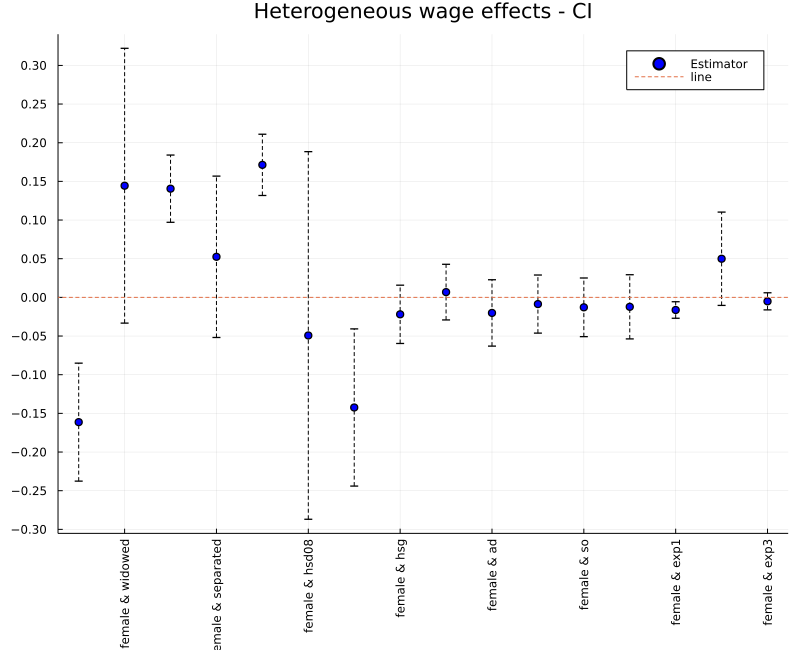

In [30]:
scatter(names(X)[index], T[!,2] , label = "Estimator", yerrors = xerror, 
        ytick = -2:0.05:2, linestyle = :dash, seriescolor=:blue)
plot!(size=(800,650), title="Heterogeneous wage effects - CI", xrotation=90)
hline!( [0], linestyle = :dash , label = "line")